#### ELEC-E8740 Basics of Sensor Fusion <br>
#### Homework 10<br>
#### Hoang Nguyen Khac 533263

### a) Simulate state and measurements from the model for 100 time steps. Plot the data.
Given a 1D non-linear model
$$
x_k = tanh(x_{k-1}) + q_{k-1}
$$
$$
y_k = sin(x_k) + r_k
$$
and 
$$
x_0 \sim N(0,1), q_{k-1} \sim N(0,0.1^2), r_k \sim N(0,0.1^2) 
$$


In [14]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

[0.72155544]


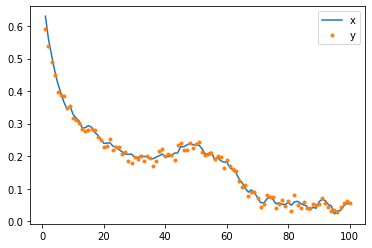

In [22]:
def f(x):
    return np.array([np.tanh(x)])

def g_fun(x):
    return np.array([np.sin(x)])

Q = 0.1**2

R = 0.1**2

steps = 100
m0 = 0  # Suitable initial mean
P0 = 1 # Suitable initial covariance

T = np.zeros((steps,))
X = np.zeros((steps,1))
Y = np.zeros((steps,1))
q = np.zeros(steps)

x = np.random.normal(m0,P0,1)
print(x)
t = 0

for n in range(steps):
    q[n] = np.random.normal(0,Q,1)
    x = f(x) + q[n]
    r = np.random.normal(0,R,1)
    y = g_fun(x) + r
    t = t + 1
    T[n] = t
    X[n] = x
    Y[n] = y

plt.clf()
plt.plot(T,X,T,Y,'.')
plt.legend(['x','y'])

### b)Derive the necessary derivatives and check that they are correct by using numerical finite differences.
- Prove that G(x) is the derivative of the function g(x) by using numerical finite differences
- $g(x) = sin(x)$ and analytically $G(x) = cos(x)$
- Given a small step between $x_{k}$ and $x_{k+1}$ as dt, if:
$$
[sin(x_{k+1}) - sin(x_k)] \approx cos(x_k)dt
$$
then $G(x)$ is the derivative of $g(x)$

In [23]:
def G_fun(x):
    return np.array([np.cos(x)])

dt = 0.1
x = np.arange(0,1,dt)

for i in range(np.size(x)-1):
    diff = (g_fun(x[i+1])-g_fun(x[i])) - G_fun(x[i])*dt
    print(linalg.norm(diff))

0.0001665833531718508
0.000664502379569526
0.00115578191784578
0.0016355132652496884
0.0020989031047360385
0.0025413213982048016
0.0029583476483121818
0.003345815066617186
0.0036998522067559214


### c) Implement and run an EKF for the model. Plot the results

0.00848403326821414


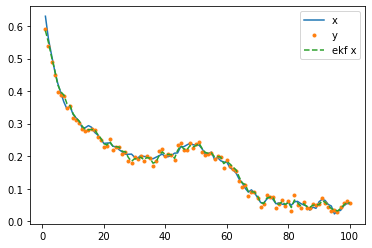

In [24]:
def F(x):
    return np.array([1-(np.tanh(x)**2)])

m = m0
P = P0
ekf_m = np.zeros((Y.shape[0],1))
ekf_P = np.zeros((Y.shape[0],1))

for n in range(Y.shape[0]):
    # Prediction
    m = f(m)
    P = F(m) * P * F(m) + Q
    # Update
    G = G_fun(m)
    S = G * P * G + R
    K = P * G * (1/S)
    m = m + K * (Y[n] - g_fun(m))
    P = P - K * S * K
    ekf_m[n] = m
    ekf_P[n] = P

print(np.sqrt(((ekf_m-X)**2).mean()))
    
plt.clf()
plt.plot(T,X,T,Y,'.',T,ekf_m,'--')
plt.legend(['x','y','ekf x'])